In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
plt.style.use('seaborn-whitegrid')
%matplotlib inline

np.random.seed(101)

normal = np.random.normal(loc=0.0, scale=1.0, size=1000)
print('Mean: %0.3f Median: %0.3f Variance: %0.3f' % (np.mean(normal),
                                                     np.median(normal),
                                                     np.var(normal)))


Mean: 0.026 Median: 0.032 Variance: 1.109


C:\Users\thiag\AppData\Local\Temp\ipykernel_23820\1134693527.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
outlying = normal.copy()

outlying[0] = 50.0
print('Mean: %0.3f Median: %0.3f Variance %0.3f' % (np.mean(outlying),
                                                    np.median(outlying),
                                                    np.var(outlying)))

print('Pearson''s correlation: %0.3f p-value %0.3f' % pearsonr(normal, outlying))

Mean: 0.074 Median: 0.032 Variance 3.597
Pearsons correlation: 0.619 p-value 0.000


In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X,y = diabetes.data, diabetes.target

In [6]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


<Axes: >

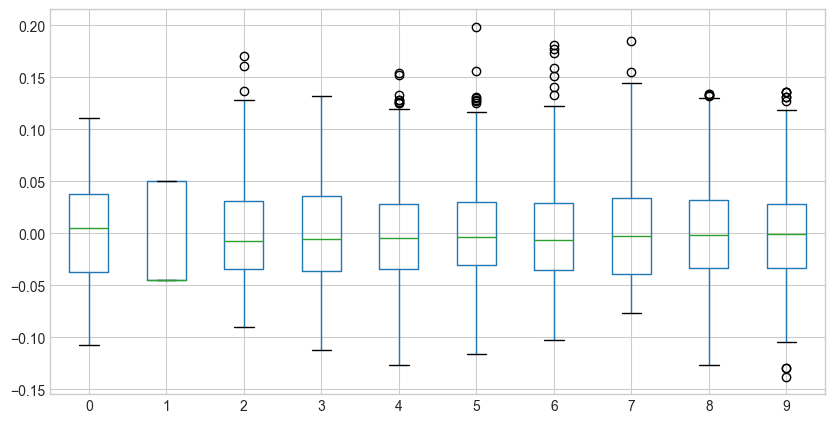

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1,
                         figsize=(10,5))
df.boxplot(ax=axes)

In [8]:
# Possíveis outliers

from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)
# .any(1) method will avoid duplicating
df[(np.abs(Xs)>3).any(1)]

,0,1,2,3,4,5,6,7,8,9
58,0.04,-0.04,-0.06,0.04,0.01,-0.06,0.18,-0.08,-0.00,-0.05
123,0.01,0.05,0.03,-0.00,0.15,0.20,-0.06,0.19,0.02,0.07
216,0.01,0.05,0.04,0.05,0.05,0.07,-0.07,0.15,0.05,0.05
230,-0.04,0.05,0.07,-0.06,0.15,0.16,0.00,0.07,0.05,0.07
256,-0.05,-0.04,0.16,-0.05,-0.03,-0.02,-0.05,0.03,0.03,0.01
260,0.04,-0.04,-0.01,-0.06,0.01,-0.03,0.15,-0.08,-0.08,-0.02
261,0.05,-0.04,-0.04,0.10,0.04,-0.03,0.18,-0.08,-0.01,0.02
269,0.01,-0.04,-0.03,-0.03,0.04,-0.01,0.16,-0.08,-0.01,-0.04
322,0.02,0.05,0.06,0.06,0.02,-0.04,-0.09,0.16,0.13,0.08
336,-0.02,-0.04,0.09,-0.04,0.09,0.09,-0.06,0.15,0.08,0.05
